# Using _bossphorus_
This notebook shows the basic use of _bossphorus_ alongside a standard installation of `intern` (available with `pip install intern`).

In [1]:
%matplotlib inline

## Imports

- `matplotlib`: Use to plot the images in the notebook
- `intern`: Use to interact with the bossphorus (or bossDB) APIs
- `numpy`: To generate data to upload and play with

In [2]:
import matplotlib.pyplot as plt
from intern.remote.boss import BossRemote
import numpy as np

## Setup
First, we'll create a new `intern.BossRemote`.  Even though the `BossRemote` was originally designed for use with a cloud-based bossDB instance, _bossphorus_ was designed to work seamlessly with this tool.

Depending on where you're running your _bossphorus_ instance, you may need to change the host in the dictionary below. 

> **Note:** You must specify a value for `token`, but it doesn't matter what it is. (This is a requirement of the `intern.BossRemote` even though _bossphorus_ doesn't use it.)  

In [3]:
boss = BossRemote({
    "protocol": "http",
    "host": "localhost:5000",
    "token": "None"
})

Next, we'll create some demo data to upload. Here, we'll just use a randomly dataset:

In [4]:
my_data = np.random.randint(0, 100, (253, 254, 255), dtype="uint8")
for i in range(my_data.shape[0]):
    my_data[i] += int(i/4)
for j in range(my_data.shape[2]):
    my_data[:,:,j] += int(j/4)

Plot the first Z-slice of our dummy data:

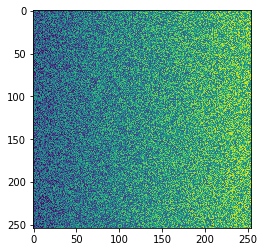

In [5]:
plt.imshow(my_data[0])

## Uploading Data

Uploading data to _bossphorus_ is easy: You can use the `intern.BossRemote#create_cutout` function, as we do below.

The `get_channel` command takes three arguments: `collection`, `experiment`, and `channel`. You can read more about these at the [bossDB documentation](https://theboss.io). For now, just know that you can use _any_ strings for these arguments, as long as you remember them and use the same ones when _retrieving_ your data.

Just like when using bossDB, you must specify the $x$, $y$, and $z$ extents of your data. For our purposes, we'll start at the origin.

_bossphorus_ always accepts data at resolution=0, so leave that value alone.

In [6]:
boss.create_cutout(
    boss.get_channel("my_channel", "my_collection", "my_experiment"),
    0, 
    [0, my_data.shape[0]], 
    [0, my_data.shape[1]], 
    [0, my_data.shape[2]], 
    my_data
)

## Retrieving Data

Likewise, we can use `BossRemote#get_cutout` to pull down data from _bossphorus_. Simply specify the (same as above) collection, experiment, channel, and resolution, and then specify which coordinates you'd like.

In [7]:
new_data = boss.get_cutout(
    boss.get_channel("my_channel", "my_collection", "my_experiment"),
    0, 
    [0, 50], 
    [0, 20], 
    [0, 10]
)

Here, we show that the data we pulled down from _bossphorus_ is exactly the same as the data we uploaded.

> **Note**: We only pulled down a smaller subsample of the available data.

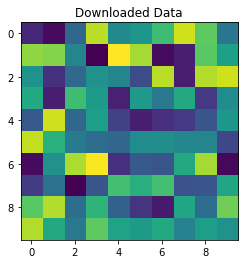

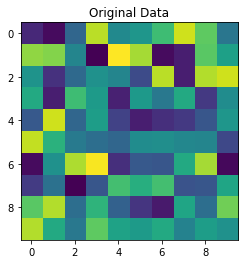

Original == Downloaded: True


In [8]:
plt.title("Downloaded Data")
plt.imshow(new_data[0][:10,:10])
plt.show()
plt.title("Original Data")
plt.imshow(my_data[0][:10, :10])
plt.show()
print("Original == Downloaded: {}".format((new_data == my_data[:10,:20,:50]).all()))